In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)
matplotlib.rcParams.update({'font.size': 20})
import pandas as pd
from virgodb import VirgoDB
vdb = VirgoDB("giorgio",password="BN401kmd")
import timeit

-- Select all progenitors of a particular galaxy


select *

from Gonzalez2014a..mr7 as prog, Gonzalez2014a..mr7 as des

where des.galaxyid = 0 and prog.galaxyid between des.galaxyid and des.lastprogenitorid

In [83]:
s1 = "select prog.mag_V_ext,prog.SDSS_u_ext,prog.SDSS_i_obs_ext,prog.stellarmass,prog.type,prog.mdhalo,prog.z,prog.redshift,prog.sfr,prog.sfrbulge,prog.galaxyid,prog.DescendantID,prog.LastProgenitorID,prog.DHaloID "

s2 = "from Gonzalez2014a..mr7 as prog "
s3 = "where prog.galaxyid = 0 and prog.galaxyid between prog.galaxyid and prog.lastprogenitorid"

s = s1 + s2 + s3
###################################
#This one seems to work
###################################
ss_1 = s1
ss_2 = "from Gonzalez2014a..mr7 as prog, Gonzalez2014a..mr7 as des "
ss_3 = "where des.galaxyid = 0 and prog.galaxyid between des.galaxyid and des.lastprogenitorid"

ss= ss_1 + ss_2 + ss_3

data = vdb.execute_query(ss)

#vdb.execute_query("select * from Gonzalez2014a..mr7 as prog, Gonzalez2014a..mr7 as des where des.galaxyid = 0 and prog.galaxyid between des.galaxyid and des.lastprogenitorid")

In [92]:
data['DHaloID'],data['LastProgenitorID'],data['mdhalo']

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]),
 array([49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49,
        49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49,
        49, 49, 44, 44, 44, 44, 44, 44, 44, 44, 44, 49, 49, 49, 49, 49]),
 array([45.515327 , 45.51487  , 45.514416 , 45.513958 , 45.513504 ,
        45.51305  , 45.512592 , 45.51214  , 45.51168  , 45.511227 ,
        45.510773 , 45.510315 , 42.606804 , 42.60638  , 42.605953 ,
        39.984447 , 39.984047 , 38.58023  , 38.579845 , 38.579456 ,
        37.831097 , 37.83072  , 37.83034  , 36.332836 , 36.332474 ,
        36.33211  , 32.025017 , 32.024693 , 30.151905 , 28.279398 ,
        28.279116 , 27.249083 , 24.720818 , 21.162727 , 21.162518 ,
        19.009    , 19.00881  , 15.825068 ,  9.925783 ,  7.3975906,
         7.397517 ,  6.8356805,  5.337449 ,  3.4646597

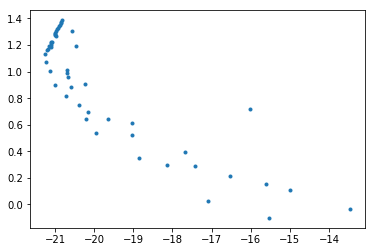

In [18]:
plt.plot(data['mag_V_ext'],data['SDSS_u_ext']-data['mag_V_ext'],".")

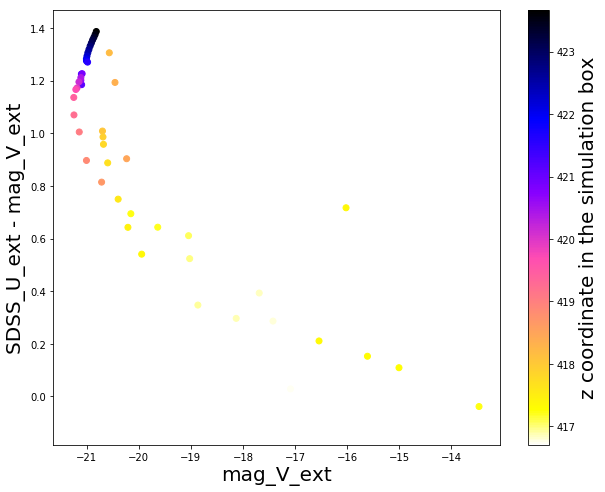

In [17]:
plt.figure(figsize=(10,8))
plt.scatter(data['mag_V_ext'],data['SDSS_u_ext']-data['mag_V_ext'],c=data['z'],cmap='gnuplot2_r')
plt.colorbar(label='z coordinate in the simulation box')
plt.xlabel("mag_V_ext")
plt.ylabel("SDSS_U_ext - mag_V_ext")
plt.show()

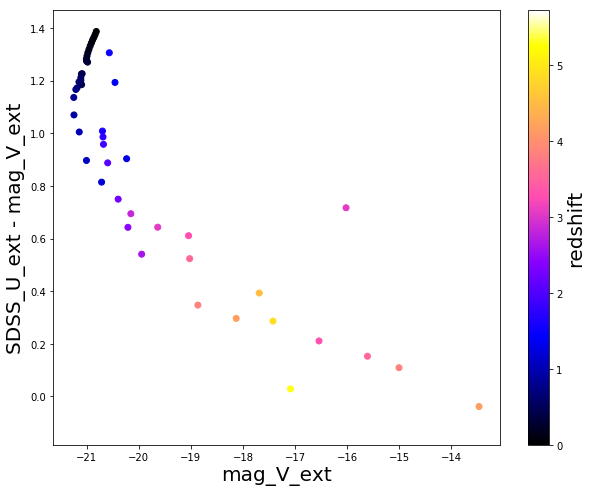

In [16]:
plt.figure(figsize=(10,8))
plt.scatter(data['mag_V_ext'],data['SDSS_u_ext']-data['mag_V_ext'],c=data['redshift'],cmap='gnuplot2')
plt.colorbar(label='redshift')
plt.xlabel("mag_V_ext")
plt.ylabel("SDSS_U_ext - mag_V_ext")
plt.savefig('../plots/005/colmag_progenitor_evolution.png')
plt.show()

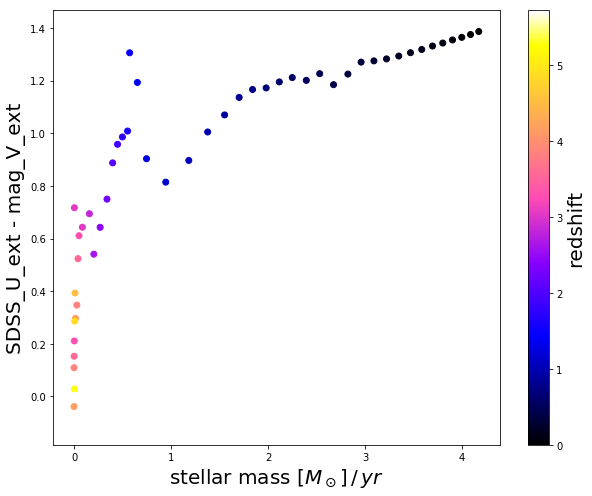

In [15]:
plt.figure(figsize=(10,8))
plt.scatter(data['stellarmass'],data['SDSS_u_ext']-data['mag_V_ext'],c=data['redshift'],cmap='gnuplot2')
plt.colorbar(label='redshift')
plt.xlabel(r"stellar mass $[M_\odot]\,/\,yr$")
plt.ylabel("SDSS_U_ext - mag_V_ext")
plt.savefig('../plots/005/colmass_progenitor_evolution.png')
plt.show()

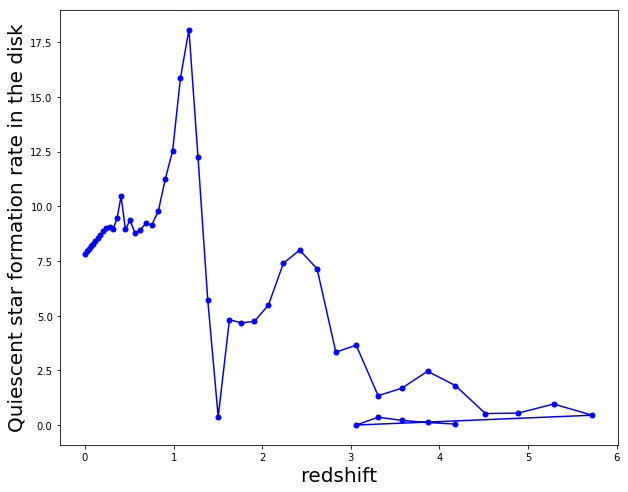

In [53]:
plt.figure(figsize=(10,8))
plt.plot(data['redshift'],data['sfr'],color='b')
plt.plot(data['redshift'],data['sfr'],'.',markersize=10,color='b')
plt.xlabel(r"redshift")
plt.ylabel("Quiescent star formation rate in the disk")
plt.savefig('../plots/005/SFH_progenitor_quiescent.png')
plt.show()

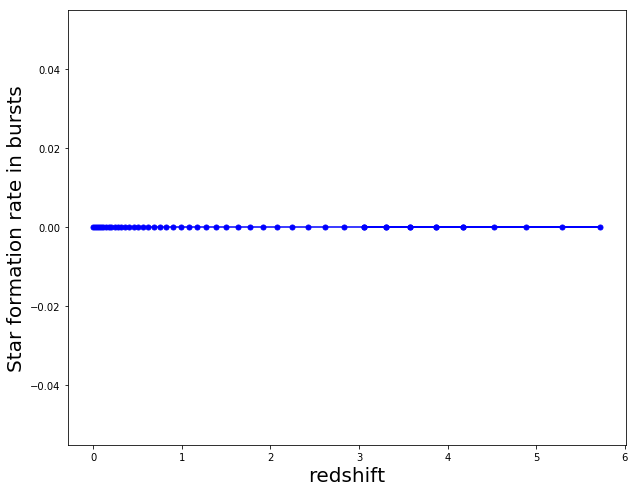

In [40]:
plt.figure(figsize=(10,8))
plt.plot(data['redshift'],data['sfrbulge'],color='b')
plt.plot(data['redshift'],data['sfrbulge'],'.',markersize=10,color='b')
plt.xlabel(r"redshift")
plt.ylabel("Star formation rate in bursts")
plt.savefig('../plots/005/SFH_progenitor_bursts.png')
plt.show()

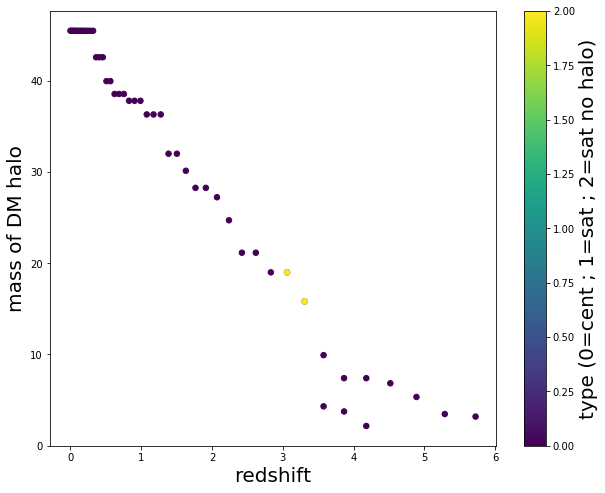

In [50]:
plt.figure(figsize=(10,8))
#plt.plot(data['redshift'],data['mdhalo'],color='b')
plt.scatter(data['redshift'],data['mdhalo'],s=30,c=data['type'])
plt.xlabel(r"redshift")
plt.ylabel("mass of DM halo")
plt.colorbar(label='type (0=cent ; 1=sat ; 2=sat no halo)')
plt.savefig('../plots/005/mdhalo_progenitor.png')
plt.show()

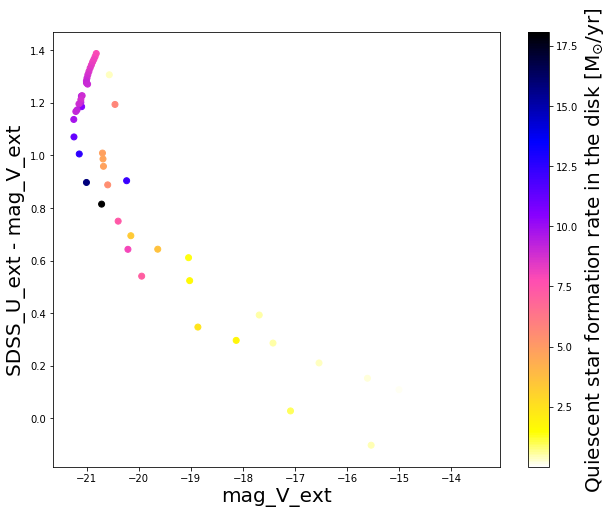

In [59]:
plt.figure(figsize=(10,8))
plt.scatter(data['mag_V_ext'],data['SDSS_u_ext']-data['mag_V_ext'],c=data['sfr'],cmap='gnuplot2_r')
plt.colorbar(label=r'Quiescent star formation rate in the disk [M$_{\odot}/\rm{yr}$]')
plt.xlabel("mag_V_ext")
plt.ylabel("SDSS_U_ext - mag_V_ext")
plt.savefig('../plots/005/colmag_progenitor_sfr.png')
plt.show()

(array([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.]),
 array([ 0.  ,  0.49,  0.98,  1.47,  1.96,  2.45,  2.94,  3.43,  3.92,
         4.41,  4.9 ,  5.39,  5.88,  6.37,  6.86,  7.35,  7.84,  8.33,
         8.82,  9.31,  9.8 , 10.29, 10.78, 11.27, 11.76, 12.25, 12.74,
        13.23, 13.72, 14.21, 14.7 , 15.19, 15.68, 16.17, 16.66, 17.15,
        17.64, 18.13, 18.62, 19.11, 19.6 , 20.09, 20.58, 21.07, 21.56,
        22.05, 22.54, 23.03, 23.52, 24.01, 24.5 , 24.99, 25.48, 25.97,
        26.46, 26.95, 27.44, 27.93, 28.42, 28.91, 29.4 , 29.89, 30.38,
        30.87, 31.36, 31.85, 32.34, 32.83, 33.32, 33.

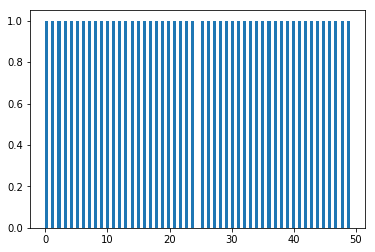

In [82]:
plt.hist(data['galaxyid'],bins=100)

In [89]:
############# Change galaxyid

ss_1 = "select prog.mag_V_ext,prog.SDSS_u_ext,prog.SDSS_i_obs_ext,prog.stellarmass,prog.type,prog.mdhalo,prog.z,prog.redshift,prog.sfr,prog.sfrbulge,prog.galaxyid ,prog.DHaloID "
ss_2 = "from Gonzalez2014a..mr7 as prog, Gonzalez2014a..mr7 as des "
ss_3 = "where des.galaxyid = 30 and prog.galaxyid between des.galaxyid and des.lastprogenitorid"

ss= ss_1 + ss_2 + ss_3

data_30 = vdb.execute_query(ss)

In [90]:
data_30['DHaloID']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

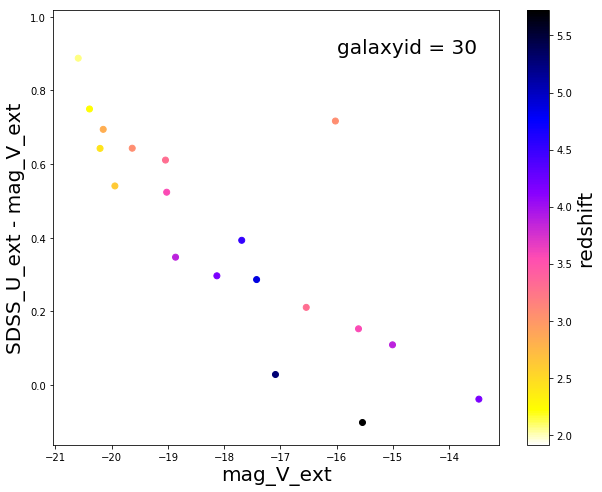

In [71]:
plt.figure(figsize=(10,8))
plt.scatter(data_30['mag_V_ext'],data_30['SDSS_u_ext']-data_30['mag_V_ext'],c=data_30['redshift'],cmap='gnuplot2_r')
plt.colorbar(label='redshift')
plt.xlabel("mag_V_ext")
plt.ylabel("SDSS_U_ext - mag_V_ext")
plt.text(-16.,0.9,'galaxyid = 30')
plt.savefig('../plots/005/colmag_progenitor_evolution_30.png')
plt.show()

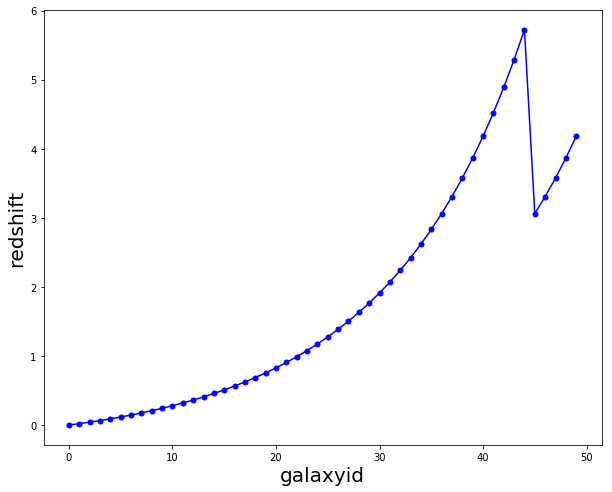

In [77]:
plt.figure(figsize=(10,8))
plt.plot(data['galaxyid'],data['redshift'],c='b')
plt.plot(data['galaxyid'],data['redshift'],'.',markersize=10,c='b')
plt.xlabel('galaxyid')
plt.ylabel('redshift')
plt.savefig('../plots/005/galaxyid_redshift.png')
plt.show()

In [81]:
len(data['galaxyid'][np.where(data['galaxyid']==2)])

1

In [97]:
s1 = "select prog.mag_V_ext,prog.SDSS_u_ext,prog.SDSS_i_obs_ext,prog.stellarmass,prog.type,prog.mdhalo,prog.z,prog.redshift,prog.sfr,prog.sfrbulge,prog.galaxyid,prog.DescendantID,prog.LastProgenitorID,prog.DHaloID,prog.snapnum "

s2 = "from Gonzalez2014a..mr7 as prog "
s3 = "where prog.galaxyid = 0 and prog.galaxyid between prog.galaxyid and prog.lastprogenitorid"

s = s1 + s2 + s3
###################################
#This one seems to work
###################################
ss_1 = s1
ss_2 = "from Gonzalez2014a..mr7 as prog, Gonzalez2014a..mr7 as des "
ss_3 = "where des.galaxyid = 0 and prog.galaxyid between des.galaxyid and des.MainLeafID"

ss= ss_1 + ss_2 + ss_3

data_ = vdb.execute_query(ss)

#vdb.execute_query("select * from Gonzalez2014a..mr7 as prog, Gonzalez2014a..mr7 as des where des.galaxyid = 0 and prog.galaxyid between des.galaxyid and des.lastprogenitorid")

In [99]:
data_['galaxyid']

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44])

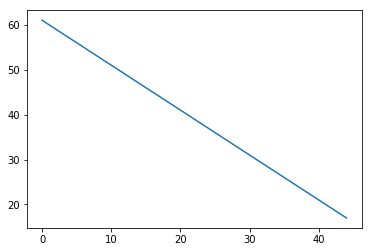

In [100]:
plt.plot(data_['galaxyid'],data_['snapnum'])

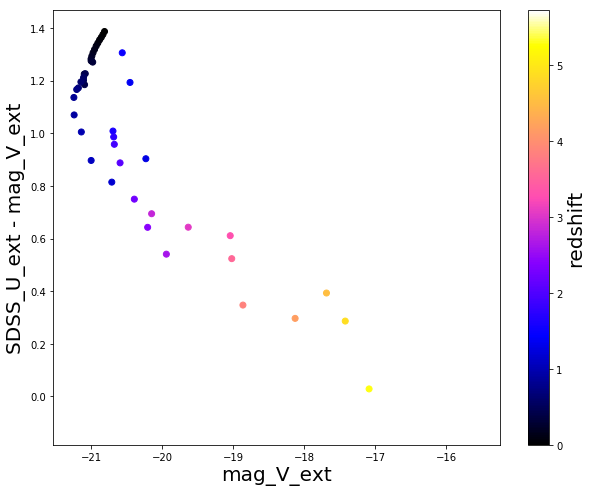

In [101]:
plt.figure(figsize=(10,8))
plt.scatter(data_['mag_V_ext'],data_['SDSS_u_ext']-data_['mag_V_ext'],c=data_['redshift'],cmap='gnuplot2')
plt.colorbar(label='redshift')
plt.xlabel("mag_V_ext")
plt.ylabel("SDSS_U_ext - mag_V_ext")
plt.savefig('../plots/005/colmag_progenitor_evolution.png')
plt.show()

# Just follow the main progenitor

Until now the query was between the galaxyid and the LastProgenitorID but this include all the galaxy who contribute to the merger tree. Instead what I want is just the evolution of the main progenitor and that can be obtained doin the query between GalaxyID and MainLeafID.

In [131]:
############# Evolution of main progenitor

ss_1 = "select prog.mag_V_ext,prog.SDSS_u_ext,prog.SDSS_i_obs_ext,prog.stellarmass, prog.type,prog.mdhalo,prog.redshift,prog.sfr,prog.sfrbulge,prog.galaxyid ,prog.DHaloID, prog.mainleafid, prog.lastprogenitorid "
ss_2 = "from Gonzalez2014a..mr7 as prog, Gonzalez2014a..mr7 as des "
ss_3 = "where des.galaxyid = 0 and prog.galaxyid between des.galaxyid and des.mainleafid"

ss= ss_1 + ss_2 + ss_3

Leaf = vdb.execute_query(ss)

In [132]:
Leaf.dtype.names

(u'mag_V_ext',
 u'SDSS_u_ext',
 u'SDSS_i_obs_ext',
 u'stellarmass',
 u'type',
 u'mdhalo',
 u'redshift',
 u'sfr',
 u'sfrbulge',
 u'galaxyid',
 u'DHaloID',
 u'mainleafid',
 u'lastprogenitorid')

In [133]:
Leaf['galaxyid']

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44])

In [134]:
Leaf['mainleafid']

array([44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44,
       44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44,
       44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44])

In [135]:
Leaf['lastprogenitorid']

array([49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49,
       49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49,
       49, 49, 44, 44, 44, 44, 44, 44, 44, 44, 44])

In [136]:
Leaf['redshift']

array([0.        , 0.01993251, 0.04140306, 0.06449342, 0.08928776,
       0.11588299, 0.14438295, 0.17489803, 0.20754898, 0.24246883,
       0.27980196, 0.31970298, 0.36233997, 0.40789902, 0.45657718,
       0.50859094, 0.56417704, 0.6235901 , 0.687109  , 0.755036  ,
       0.82769895, 0.905462  , 0.988708  , 1.0778699 , 1.17342   ,
       1.27585   , 1.3857203 , 1.5036402 , 1.63027   , 1.76634   ,
       1.9126298 , 2.07003   , 2.2394903 , 2.4220402 , 2.61886   ,
       2.8311799 , 3.06042   , 3.3080997 , 3.57591   , 3.8656797 ,
       4.1794705 , 4.51956   , 4.8884506 , 5.2888303 , 5.7238603 ],
      dtype=float32)

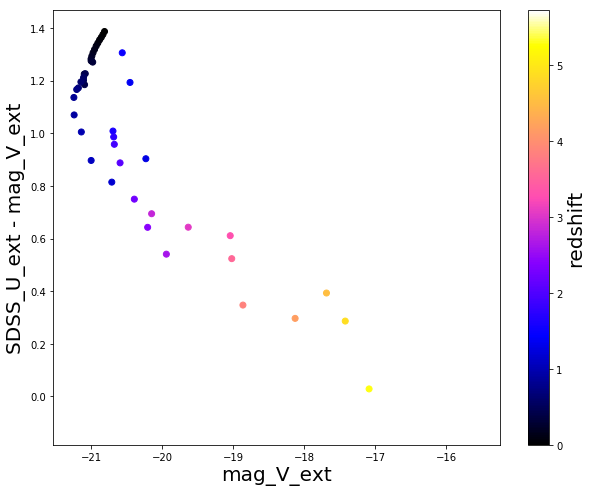

In [148]:
plt.figure(figsize=(10,8))
plt.scatter(Leaf['mag_V_ext'],Leaf['SDSS_u_ext']-Leaf['mag_V_ext'],c=Leaf['redshift'],cmap='gnuplot2')
plt.colorbar(label='redshift')
plt.xlabel("mag_V_ext")
plt.ylabel("SDSS_U_ext - mag_V_ext")
plt.savefig('../plots/005/colmag_progenitor_evolution.png')
plt.show()

In [138]:
z05 = np.where(Leaf['redshift']<0.5)

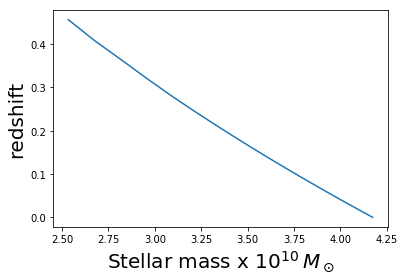

In [143]:
plt.plot(Leaf['stellarmass'][z05],Leaf['redshift'][z05])
plt.xlabel(r'Stellar mass x $10^{10} \, M_\odot$')
plt.ylabel('redshift')
plt.show()

In [147]:
for i in z05[0]:
    #print z05[0][i]
    print Leaf['redshift'][np.where(Leaf['galaxyid']==z05[0][i])], Leaf['stellarmass'][np.where(Leaf['galaxyid']==z05[0][i])]

[0.]
[0.01993251]
[0.04140306]
[0.06449342]
[0.08928776]
[0.11588299]
[0.14438295]
[0.17489803]
[0.20754898]
[0.24246883]
[0.27980196]
[0.31970298]
[0.36233997]
[0.40789902]
[0.45657718]


# Carlton plot: Stellar-mass(z=0) vs redshift(MainLeafID)

In [184]:
############# Galaxies in SnapShot at z=0

ss_1 = "select prog.mag_V_ext,prog.SDSS_u_ext,prog.SDSS_i_obs_ext,prog.stellarmass, prog.type,prog.mdhalo,prog.redshift,prog.sfr,prog.sfrbulge,prog.galaxyid ,prog.DHaloID, prog.mainleafid, prog.lastprogenitorid ,prog.random "
#ss_1 = "select count * "
ss_2 = "from Gonzalez2014a..mr7 as prog " #, Gonzalez2014a..mr7 as des "
ss_3 = "where prog.snapnum=60 and prog.random<0.0001"

ss= ss_1 + ss_2 + ss_3

today = vdb.execute_query(ss)

In [186]:
len(today['random'])

3072

In [194]:
today.dtype.names

(u'mag_V_ext',
 u'SDSS_u_ext',
 u'SDSS_i_obs_ext',
 u'stellarmass',
 u'type',
 u'mdhalo',
 u'redshift',
 u'sfr',
 u'sfrbulge',
 u'galaxyid',
 u'DHaloID',
 u'mainleafid',
 u'lastprogenitorid',
 u'random')

In [187]:
def get_redshift(all_ids,all_reds,galaxy_id):
    output_redshift = np.nan
    for i in range(len(all_ids)):
        if all_ids[i]==galaxy_id:
            output_redshift = all_reds[i]
    return output_redshift
    

In [189]:
today['galaxyid'],today['redshift']

(array([ 1500018420000001,  1500037920000001,  1500086130000001, ...,
        49400021960000001, 49400028960000001, 50200562310000001]),
 array([0.01993251, 0.01993251, 0.01993251, ..., 0.01993251, 0.01993251,
        0.01993251], dtype=float32))

In [191]:
get_redshift(today['galaxyid'],today['redshift'],1500018420000001)

0.019932508

In [270]:
# it queries the database for the galaxy with the id passed as a parameter
def getRedshift_DB1(id_gal):
    query = 'select redshift from Gonzalez2014a..mr7 where galaxyid='+str(id_gal)
    return vdb.execute_query(query)[0][0]

In [271]:
today['mainleafid']

array([ 1500018420000035,  1500037920000046,  1500086130000041, ...,
       49400021960000026, 49400028960000038, 50200562310000013])

In [276]:
start = timeit.timeit()
zp = getRedshift_DB1(today['mainleafid'][0])
end = timeit.timeit()
print "delta time = ",end-start
print zp

delta time =  -0.000664949417114
2.8311799


In [274]:
len(today)

3072

In [277]:
start = timeit.timeit()
z_prog = np.zeros(len(today))
for i in range(len(today)):
    z_prog[i] = getRedshift_DB1(today['mainleafid'][i])
end = timeit.timeit()
print "delta time = ",end-start
print z_prog

delta time =  -0.000221014022827
[2.83117986 6.71159029 4.51955986 ... 1.38572025 3.57591009 0.40789902]


In [278]:
z_prog

array([2.83117986, 6.71159029, 4.51955986, ..., 1.38572025, 3.57591009,
       0.40789902])

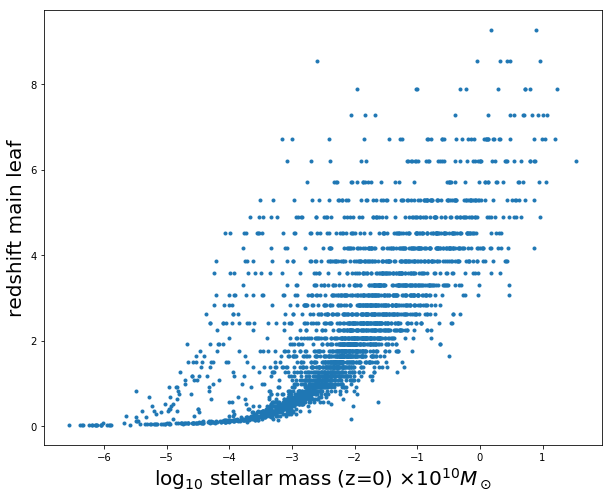

In [306]:
plt.figure(figsize=(10,8))
plt.plot(np.log10(today['stellarmass']),z_prog,".")
plt.xlabel(r'log$_{10}$ stellar mass (z=0) $\times 10^{10} M_\odot$')
plt.ylabel('redshift main leaf')
plt.savefig('../plots/005/progenitor_z_mass.png')
plt.show()

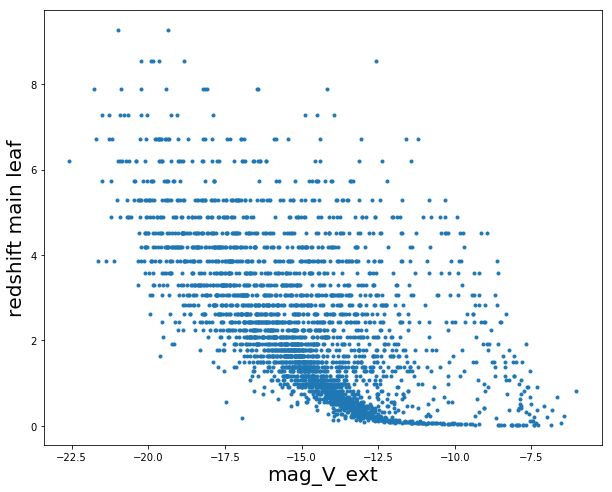

In [307]:
plt.figure(figsize=(10,8))
plt.plot(today['mag_V_ext'],z_prog,".")
plt.xlabel(r'mag_V_ext')
plt.ylabel('redshift main leaf')
plt.savefig('../plots/005/progenitor_z_magV.png')
plt.show()

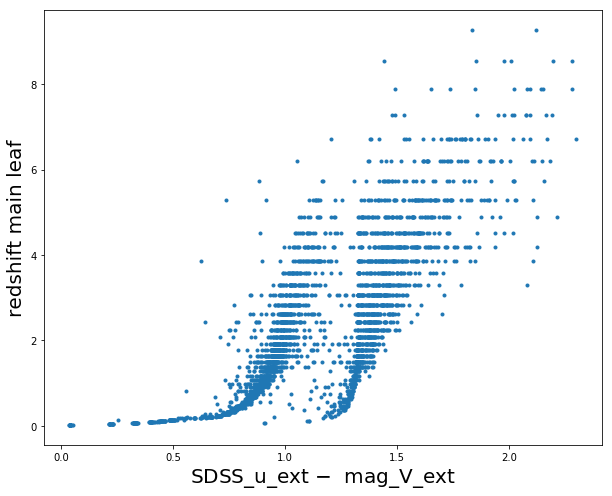

In [323]:
plt.figure(figsize=(10,8))
plt.plot(today['SDSS_u_ext']-today['mag_V_ext'],z_prog,".")
plt.xlabel(r'SDSS_u_ext $-$  mag_V_ext')
plt.ylabel('redshift main leaf')
plt.savefig('../plots/005/progenitor_z_U_V.png')
plt.show()

## Better to save the data in a text file since the query for the redshift progenitor was very long

In [320]:
#####save in txt (no need to run it again)
#a = list(map(str,today['mainleafid']))
a = today['mainleafid']
#aa = a.astype(str)
b = np.log10(today['stellarmass'])
#bb = b.astype(str)
c = z_prog
#cc = c.astype(str)
mat = [a,b,c]
mat =np.array(mat)
np.savetxt('../data/progenitor_z.txt',mat.T,encoding='utf-8',header='MainLeafID \t log10(stellarmass)(z=0) \t MainLeaf redshift')

Attempt to do a unique query for all the galaxies I need. Unfortunately the syntax is too long.

In [324]:
q = 'select redshift from Gonzalez2014a..mr7 where galaxyid='+str(today['mainleafid'][0])+" or galaxyid="+str(today['mainleafid'][1])
trial = vdb.execute_query(q)

In [331]:
def build_query():
    q1 = 'select redshift from Gonzalez2014a..mr7 where '
    for i in range(len(today)):
        q1 = q1 +' galaxyid='+str(today['mainleafid'][i])+' or '
    q1 = q1[0:-3]
    return q1

In [333]:
#query = build_query()
#trial = vdb.execute_query(query)

# Now I want to see the evolution of the colour-magnitude of the progenitors for a snapshot at z=0.45 going to redshift z=1.15.

In [351]:
############# Galaxies in SnapShot at z=0.456577 (Snapnum=47)
start = timeit.timeit()
ss_1 = "select prog.mag_V_ext,prog.SDSS_u_ext,prog.SDSS_i_obs_ext,prog.stellarmass, prog.type,prog.mdhalo,prog.redshift,prog.sfr,prog.sfrbulge,prog.galaxyid ,prog.DHaloID, prog.mainleafid, prog.lastprogenitorid ,prog.random "
ss_2 = "from Gonzalez2014a..mr7 as prog " #, Gonzalez2014a..mr7 as des "
ss_3 = "where prog.snapnum=47 and prog.random<0.0001"
ss= ss_1 + ss_2 + ss_3
snap_47 = vdb.execute_query(ss)
end = timeit.timeit()
print "time of the query = ",start-end," seconds"
print "number of galaxies = ",len(snap_47)

time of the query =  7.00950622559e-05  seconds
number of galaxies =  2981


In [352]:
snap_47.dtype.names

(u'mag_V_ext',
 u'SDSS_u_ext',
 u'SDSS_i_obs_ext',
 u'stellarmass',
 u'type',
 u'mdhalo',
 u'redshift',
 u'sfr',
 u'sfrbulge',
 u'galaxyid',
 u'DHaloID',
 u'mainleafid',
 u'lastprogenitorid',
 u'random')

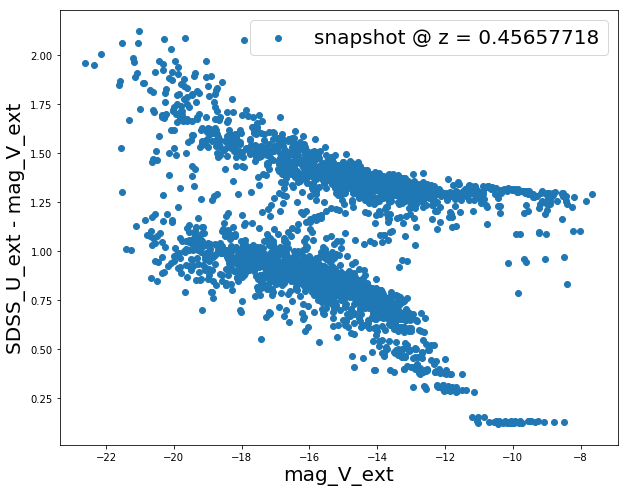

In [353]:
plt.figure(figsize=(10,8))
plt.scatter(snap_47['mag_V_ext'],snap_47['SDSS_u_ext']-snap_47['mag_V_ext'],label='snapshot @ z = '+str(snap_47['redshift'][0]))
plt.xlabel("mag_V_ext")
plt.ylabel("SDSS_U_ext - mag_V_ext")
plt.legend()
#plt.savefig('../plots/005/colmag_progenitor_evolution.png')
plt.show()

In [354]:
# it queries the database for the galaxy with the id passed as a parameter
def getProperties_DB1(id_gal):
    query = 'select redshift,mag_V_ext,SDSS_u_ext,SDSS_i_obs_ext  from Gonzalez2014a..mr7 where galaxyid='+str(id_gal)
    return vdb.execute_query(query)[0]

# Don't run the following unless you are very sure

In [364]:
#prog.mag_V_ext,prog.SDSS_u_ext,prog.SDSS_i_obs_ext,prog.stellarmass, prog.type,prog.mdhalo,prog.redshift,prog.sfr,prog.sfrbulge,prog.galaxyid ,prog.DHaloID, prog.mainleafid, prog.lastprogenitorid ,prog.random "

#before running that again, make it more efficient and save the 4 values of the query in one single time

start = timeit.timeit()
z_prog_47 = np.zeros(len(snap_47))
v_prog_47 = np.zeros(len(snap_47))
u_prog_47 = np.zeros(len(snap_47))
i_prog_47 = np.zeros(len(snap_47))
for i in range(len(snap_47)):
    z_prog_47[i] = getProperties_DB1(snap_47['mainleafid'][i])[0] #this make 4 times the same query...
    v_prog_47[i] = getProperties_DB1(snap_47['mainleafid'][i])[1]
    u_prog_47[i] = getProperties_DB1(snap_47['mainleafid'][i])[2]
    i_prog_47[i] = getProperties_DB1(snap_47['mainleafid'][i])[3]
end = timeit.timeit()
print "delta time = ",end-start
print z_prog_47

delta time =  -0.000990152359009
[0.82769895 4.51955986 1.63027    ... 1.38572025 0.82769895 2.23949027]


Let's save before I do something stupid!!! (The query lasted hours)

In [367]:
a0 = snap_47['galaxyid']
a1 = snap_47['redshift']
a2 = snap_47['mag_V_ext']
a3 = snap_47['SDSS_u_ext']
a4 = snap_47['SDSS_i_obs_ext']
a5 = snap_47['mainleafid']
a6 = z_prog_47
a7 = v_prog_47
a8 = u_prog_47
a9 = i_prog_47

mat = [a0,a1,a2,a3,a4,a5,a6,a7,a8,a9]
mat = np.array(mat)

np.savetxt('../data/progenitor_of_z045.txt',mat.T,encoding='utf-8',header='id \t z \t v \t u \t i \t main_leaf \t z_ML \t v_ML \t u_ML \t i_ML ')

In [360]:
print today['mainleafid'][0]
print today['redshift'][0]
print today['galaxyid'][0]

1500018420000035
0.019932508
1500018420000001


In [362]:
getProperties_DB1(today['galaxyid'][0]).dtype.names

(u'redshift', u'mag_V_ext', u'SDSS_u_ext', u'SDSS_i_obs_ext')

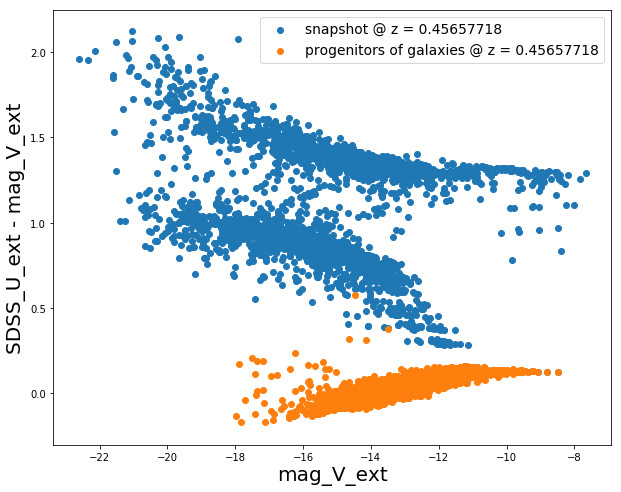

In [377]:
plt.figure(figsize=(10,8))
plt.scatter(snap_47['mag_V_ext'],snap_47['SDSS_u_ext']-snap_47['mag_V_ext'],label='snapshot @ z = '+str(snap_47['redshift'][0]))
plt.scatter(v_prog_47,u_prog_47-v_prog_47,label='progenitors of galaxies @ z = '+str(snap_47['redshift'][0]))
plt.xlabel("mag_V_ext")
plt.ylabel("SDSS_U_ext - mag_V_ext")
#plt.ylim(-0.3,0.4)
plt.legend(fontsize='x-small')
plt.savefig('../plots/005/colmag_progenitor_of_low_redshift.png')
plt.show()

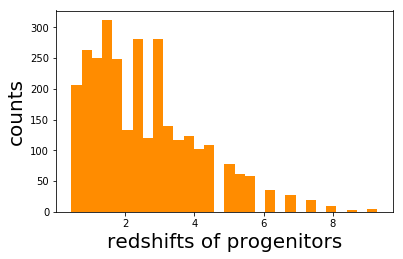

In [384]:
plt.hist(z_prog_47,bins=30,color='darkorange')
plt.xlabel('redshifts of progenitors')
plt.ylabel('counts')
plt.tight_layout()
plt.savefig('../plots/005/histo_redshift_progenitor_z045.png')
plt.show()

(array([101.,  96.,  79., 119., 104., 102., 102.,  99., 108.,  92.,  85.,
         98., 100., 103.,  95.,  91.,  89., 116.,  96., 100.,  95., 110.,
        109., 100.,  94.,  94., 111., 110.,  98.,  85.]),
 array([6.42700000e+10, 1.70341449e+15, 3.40676471e+15, 5.11011494e+15,
        6.81346516e+15, 8.51681538e+15, 1.02201656e+16, 1.19235158e+16,
        1.36268660e+16, 1.53302163e+16, 1.70335665e+16, 1.87369167e+16,
        2.04402669e+16, 2.21436172e+16, 2.38469674e+16, 2.55503176e+16,
        2.72536678e+16, 2.89570180e+16, 3.06603683e+16, 3.23637185e+16,
        3.40670687e+16, 3.57704189e+16, 3.74737692e+16, 3.91771194e+16,
        4.08804696e+16, 4.25838198e+16, 4.42871700e+16, 4.59905203e+16,
        4.76938705e+16, 4.93972207e+16, 5.11005709e+16]),
 <a list of 30 Patch objects>)

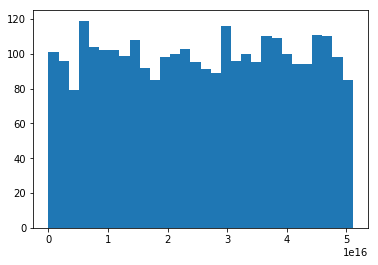

In [385]:
plt.hist(snap_47['mainleafid'],bins=30)

# More efficient query (for the same random <0.0001)

In [11]:
query =  'SELECT des.mag_V_ext as d_mag_V_ext, des.SDSS_u_ext as d_SDSS_u_ext, prog.mag_V_ext as p_mag_V_ext, prog.SDSS_u_ext as p_SDSS_u_ext '
query += 'FROM Gonzalez2014a..mr7 as prog, Gonzalez2014a..mr7 as des '   
query += 'WHERE des.mainleafid = prog.galaxyid '
query += 'AND des.snapnum=47 AND des.random<0.0001 '
z_47_prog = vdb.execute_query(query)

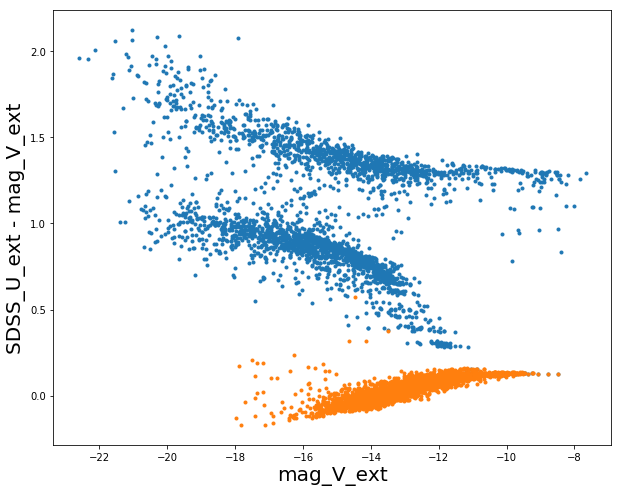

In [29]:
plt.figure(figsize=(10,8))
plt.plot(z_47_prog['d_mag_V_ext'],z_47_prog['d_SDSS_u_ext']-z_47_prog['d_mag_V_ext'],'.')
plt.plot(z_47_prog['p_mag_V_ext'],z_47_prog['p_SDSS_u_ext']-z_47_prog['p_mag_V_ext'],'.')
plt.xlabel("mag_V_ext")
plt.ylabel("SDSS_U_ext - mag_V_ext")
plt.show()

# Now let's remove the random to look at 29,950,261 objects

The following query is quite slow because it's trying to get a lot of objects (but it would have been impossible to run it in the previous way)

In [20]:
query =  'SELECT des.mag_V_ext as d_mag_V_ext, des.SDSS_u_ext as d_SDSS_u_ext, prog.mag_V_ext as p_mag_V_ext, prog.SDSS_u_ext as p_SDSS_u_ext '
query += 'FROM Gonzalez2014a..mr7 as prog, Gonzalez2014a..mr7 as des '   
query += 'WHERE des.mainleafid = prog.galaxyid '
query += 'AND des.snapnum=47 and des.random<0.01 '
z_47_ALL = vdb.execute_query(query)

In [21]:
len(z_47_ALL)

299923

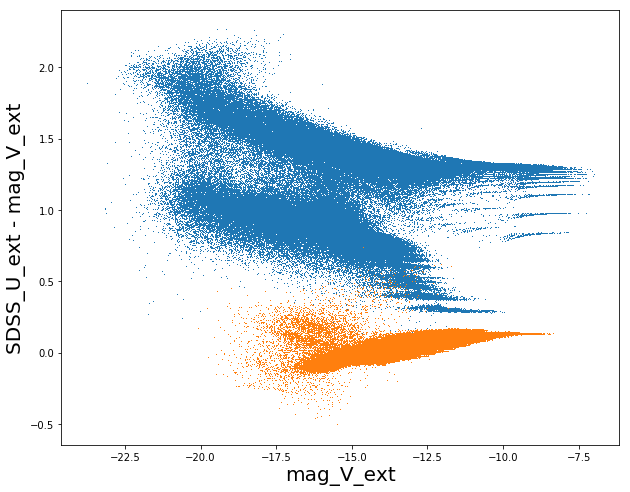

In [31]:
plt.figure(figsize=(10,8))
plt.plot(z_47_ALL['d_mag_V_ext'],z_47_ALL['d_SDSS_u_ext']-z_47_ALL['d_mag_V_ext'],',')
plt.plot(z_47_ALL['p_mag_V_ext'],z_47_ALL['p_SDSS_u_ext']-z_47_ALL['p_mag_V_ext'],',')
plt.xlabel("mag_V_ext")
plt.ylabel("SDSS_U_ext - mag_V_ext")
plt.show()

# GOOD QUERY: random<0.1 (snapnum=47, z=0.46)

In [58]:
query =  'SELECT des.mag_V_ext as d_mag_V_ext, des.SDSS_u_ext as d_SDSS_u_ext, prog.mag_V_ext as p_mag_V_ext, prog.SDSS_u_ext as p_SDSS_u_ext ,prog.stellarmass as p_stellarmass,des.stellarmass as d_stellarmass,prog.redshift as p_redshift  ' 
query += 'FROM Gonzalez2014a..mr7 as prog, Gonzalez2014a..mr7 as des '   
query += 'WHERE des.mainleafid = prog.galaxyid '
query += 'AND des.snapnum=47 and des.random<0.1 '
z_47_rand10 = vdb.execute_query(query)

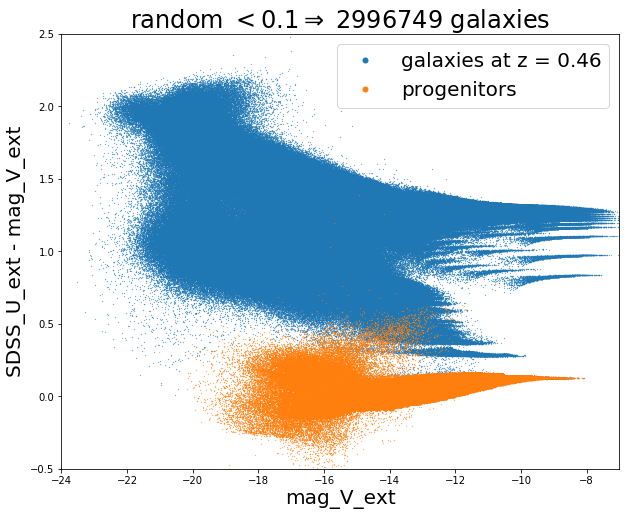

In [152]:
plt.figure(figsize=(10,8))
plt.plot(z_47_rand10['d_mag_V_ext'],z_47_rand10['d_SDSS_u_ext']-z_47_rand10['d_mag_V_ext'],'.',markersize=0.5,label='galaxies at z = 0.46')
plt.plot(z_47_rand10['p_mag_V_ext'],z_47_rand10['p_SDSS_u_ext']-z_47_rand10['p_mag_V_ext'],'.',markersize=0.5,label='progenitors')
plt.xlabel("mag_V_ext")
plt.ylabel("SDSS_U_ext - mag_V_ext")
plt.xlim(-24,-7)
plt.ylim(-0.5,2.5)
plt.title(r'random $< 0.1 \Rightarrow$ '+str(len(z_47_rand10))+' galaxies')
plt.legend(markerscale=20)
plt.savefig('../plots/005/colmag_progenitor_snap47_r10.png')
plt.show()

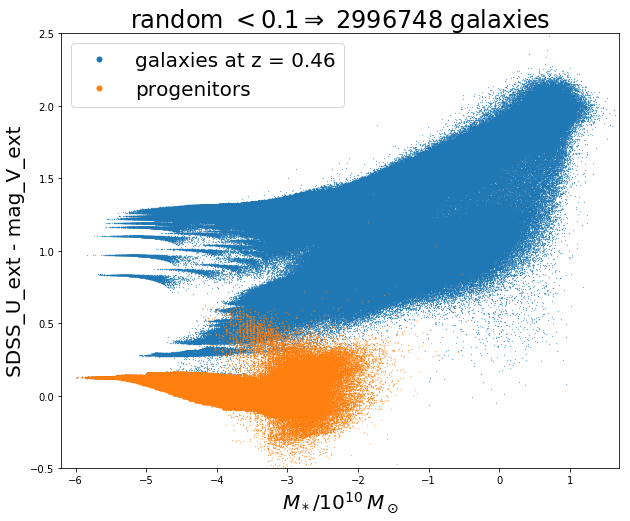

In [187]:
plt.figure(figsize=(10,8))

sel = np.where(z_47_rand10['d_stellarmass']>0.)

plt.plot(np.log10(z_47_rand10['d_stellarmass'][sel]),z_47_rand10['d_SDSS_u_ext'][sel]-z_47_rand10['d_mag_V_ext'][sel],'.',markersize=0.5,label='galaxies at z = 0.46')
plt.plot(np.log10(z_47_rand10['p_stellarmass'][sel]),z_47_rand10['p_SDSS_u_ext'][sel]-z_47_rand10['p_mag_V_ext'][sel],'.',markersize=0.5,label='progenitors')
plt.xlabel(r"$M_* / 10^{10} \, M_\odot$")
plt.ylabel("SDSS_U_ext - mag_V_ext")
plt.xlim(-6.2,1.7)
plt.ylim(-0.5,2.5)
plt.title(r'random $< 0.1 \Rightarrow$ '+str(len(z_47_rand10[sel]))+' galaxies')
plt.legend(markerscale=20)
plt.savefig('../plots/005/colmass_progenitor_snap47_r10.png')
plt.show()

Let's use z_47_rand10 since includes enough galaxies (2,996,749) without breaking down as it happens when I do not use any random contraints.

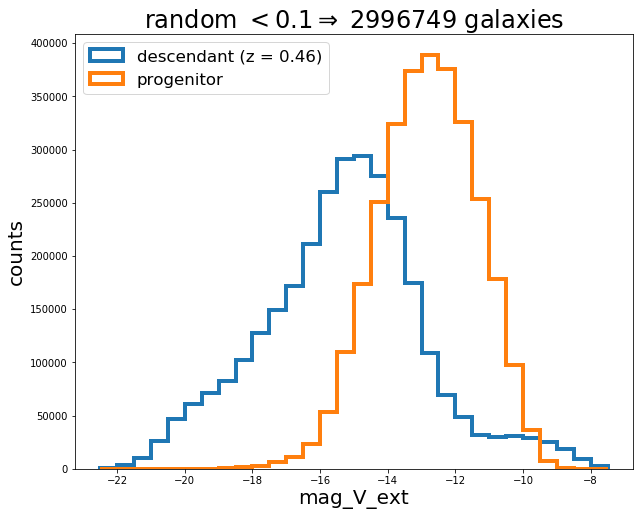

In [57]:
plt.figure(figsize=(10,8))
plt.hist(z_47_rand10['d_mag_V_ext'],bins=30,range=(-22.5,-7.5),histtype='step',lw=4,label='descendant (z = 0.46)')
plt.hist(z_47_rand10['p_mag_V_ext'],bins=30,range=(-22.5,-7.5),histtype='step',lw=4,label='progenitor')
plt.legend(loc=2,fontsize='small')
plt.xlabel("mag_V_ext")
plt.ylabel('counts')
plt.title(r'random $< 0.1 \Rightarrow$ '+str(len(z_47_rand10))+' galaxies')
plt.savefig('../plots/005/progenitor_magnitudes.png')
plt.show()

2996748


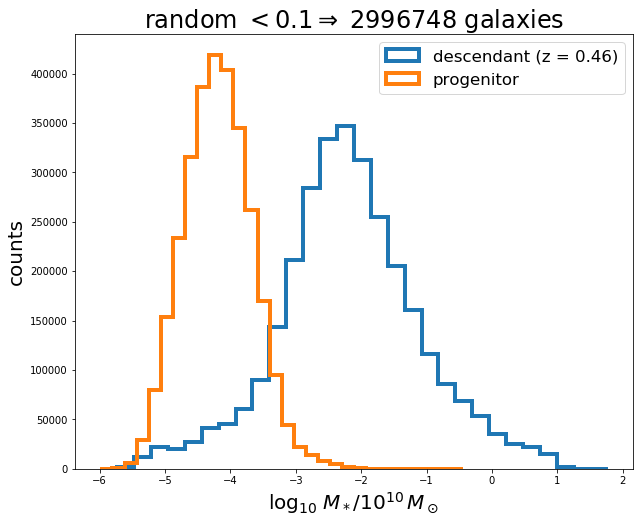

In [91]:
plt.figure(figsize=(10,8))
sel = np.where(z_47_rand10['d_stellarmass']>0.)
print len(sel[0])
plt.hist(np.log10(z_47_rand10['d_stellarmass'][sel]),bins=30,histtype='step',lw=4,label='descendant (z = 0.46)')
plt.hist(np.log10(z_47_rand10['p_stellarmass'][sel]),bins=30,histtype='step',lw=4,label='progenitor')
plt.legend(loc=1,fontsize='small')
plt.xlabel(r"$\log_{10}\;M_* / 10^{10} \, M_\odot$")
plt.ylabel('counts')
plt.title(r'random $< 0.1 \Rightarrow$ '+str(len(z_47_rand10[sel]))+' galaxies')
plt.savefig('../plots/005/progenitor_masses.png')
plt.show()

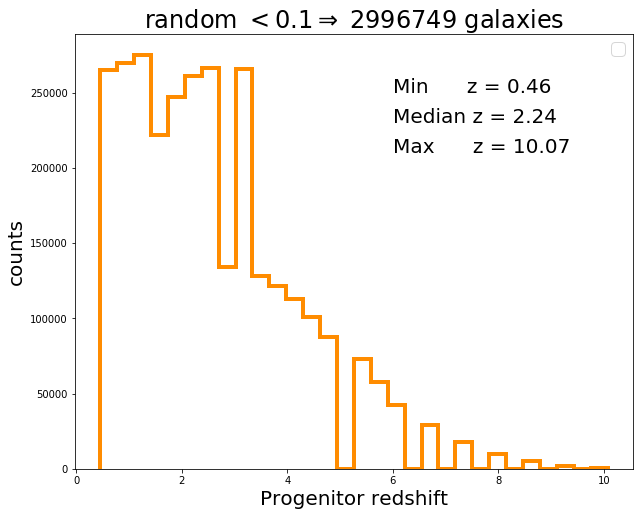

In [86]:
plt.figure(figsize=(10,8))
plt.hist(z_47_rand10['p_redshift'],bins=30,histtype='step',lw=4,color='darkorange')
plt.legend(loc=1,fontsize='small')
plt.xlabel(r"Progenitor redshift")
plt.ylabel('counts')
plt.title(r'random $< 0.1 \Rightarrow$ '+str(len(z_47_rand10))+' galaxies')
plt.text(6.,250000.,'Min      z = '+str(round(np.min(z_47_rand10['p_redshift']),2)))
plt.text(6.,230000.,'Median z = '+str(round(np.median(z_47_rand10['p_redshift']),2)))
plt.text(6.,210000.,'Max      z = '+str(round(np.max(z_47_rand10['p_redshift']),2)))
plt.savefig('../plots/005/progenitor_redshifts.png')
plt.show()

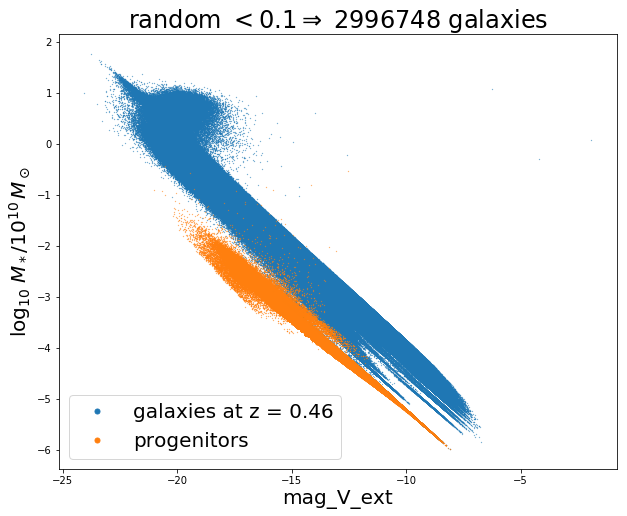

In [179]:
plt.figure(figsize=(10,8))
sel = np.where(z_47_rand10['d_stellarmass']>0.)

plt.plot(z_47_rand10['d_mag_V_ext'][sel],np.log10(z_47_rand10['d_stellarmass'][sel]),'.',markersize=0.5,label='galaxies at z = 0.46')
plt.plot(z_47_rand10['p_mag_V_ext'][sel],np.log10(z_47_rand10['p_stellarmass'][sel]),'.',markersize=0.5,label='progenitors')
plt.xlabel("mag_V_ext")
plt.ylabel(r"$\log_{10} \; M_* / 10^{10} \, M_\odot$")
plt.title(r'random $< 0.1 \Rightarrow$ '+str(len(z_47_rand10[sel]))+' galaxies')
plt.legend(markerscale=20)
plt.savefig('../plots/005/mag_mass_relation_progenitor_r10.png')
plt.show()

# Read VIPERS

In [103]:
from fase.fileio import Table

In [114]:
vip = Table('../data/Data_Sample_V7.fits',hdu=8)

In [115]:
vip.getColNames()

array(['num_1', 'pointing', 'zspec_1', 'zflg', 'norm', 'selmag',
       'mono_Name', 'OBJECT', 'Z_1', 'TEMPL', 'SM_NORM', 'LG_T_NORM',
       'CHI2', 'AGE_2', 'TAU_2', 'OII_LUMINOSITY', 'HA_LUMINOSITY',
       'DUST_LUMINOSITY', 'STELLAR_MASS', 'GAS_MASS', 'D4000_NARROW',
       'MEAN_STELLAR_AGE', 'TOTAL_MASS', '4000_ANGSTROM_BREAK',
       'STAR_FORMATION_RATE', 'FUV_abs', 'NUV_abs', 'ULS_abs', 'VJ_abs',
       'BJ_abs', 'Ks_abs', 'RJ_abs', 'IJ_abs', 'ILS_abs', 'ZLS_abs',
       'UJ_abs', 'GLS_abs', 'RLS_abs', 'num_3', 'zspec_3', 'age_3',
       'tau_3', 'A_V', 'ExtLaw', 'metall', 'M_u_CFHTLS', 'M_g_CFHTLS',
       'M_r_CFHTLS', 'M_i_CFHTLS', 'M_z_CFHTLS', 'M_Uj', 'M_B', 'M_V',
       'M_R', 'M_I', 'M_J', 'M_H', 'M_Ks', 'M_FUV', 'M_NUV',
       'log_stellar_mass', 'log_SFR', 'z_min', 'z_max', 'DL', 'DL_MM',
       'CE_t', 'CE_PT', 'num_4', 'zspec_4', 'OIIIa_EW', 'OIIIa_EW_Sig',
       'OIIIa_Flux', 'OIIIa_Flux_Sig', 'OIIIa_FWHM', 'OIIIa_Cont',
       'OIIIa_Cont_Sig', 'OII_EW', 'OII_

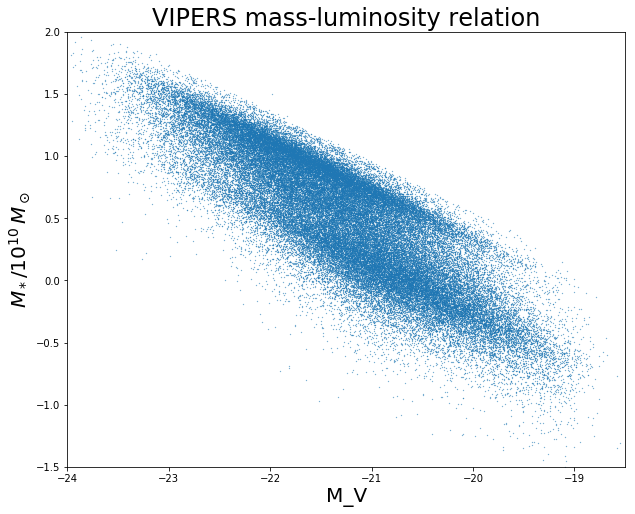

In [170]:
plt.figure(figsize=(10,8))
plt.plot(vip.getCol('M_V'),vip.getCol('STELLAR_MASS')-10,".",markersize=0.5,color='C0')
plt.xlabel('M_V')
plt.ylabel(r"$M_* / 10^{10} \, M_\odot$")
plt.xlim(-24,-18.5)
plt.ylim(-1.5,2.)
plt.title('VIPERS mass-luminosity relation')
plt.savefig('../plots/005/mass_luminosity_VIPERS.png')
plt.show()

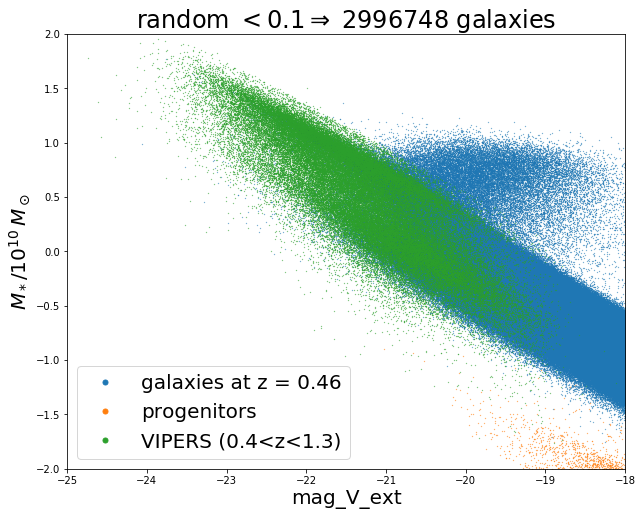

In [143]:
plt.figure(figsize=(10,8))
sel = np.where(z_47_rand10['d_stellarmass']>0.)

plt.plot(z_47_rand10['d_mag_V_ext'][sel],np.log10(z_47_rand10['d_stellarmass'][sel]),'.',markersize=0.5,label='galaxies at z = 0.46',color='C0')
plt.plot(z_47_rand10['p_mag_V_ext'][sel],np.log10(z_47_rand10['p_stellarmass'][sel]),'.',markersize=0.5,label='progenitors',color='C1')

plt.plot(vip.getCol('M_V'),(vip.getCol('STELLAR_MASS')-10),".",markersize=0.5,label='VIPERS (0.4<z<1.3)',color='C2')

plt.xlim(-25,-6)
#zoom
plt.xlim(-25,-18)
plt.ylim(-2,2)

plt.xlabel("mag_V_ext")
plt.ylabel(r"$M_* / 10^{10} \, M_\odot$")
plt.title(r'random $< 0.1 \Rightarrow$ '+str(len(z_47_rand10[sel]))+' galaxies')
plt.legend(markerscale=20)
#plt.savefig('../plots/005/mag_mass_relation_progenitor_r10_VIPERS.png')
plt.savefig('../plots/005/mag_mass_relation_progenitor_r10_VIPERS_zoom.png')
plt.show()

# GOOD QUERY: random<0.1 (snapnum=30, z=2.07)

In [144]:
query =  'SELECT des.mag_V_ext as d_mag_V_ext, des.SDSS_u_ext as d_SDSS_u_ext, prog.mag_V_ext as p_mag_V_ext, prog.SDSS_u_ext as p_SDSS_u_ext ,prog.stellarmass as p_stellarmass,des.stellarmass as d_stellarmass,prog.redshift as p_redshift  ' 
query += 'FROM Gonzalez2014a..mr7 as prog, Gonzalez2014a..mr7 as des '   
query += 'WHERE des.mainleafid = prog.galaxyid '
query += 'AND des.snapnum=30 and des.random<0.1 '
z_30_rand10 = vdb.execute_query(query)

In [145]:
len(z_30_rand10)

2154491

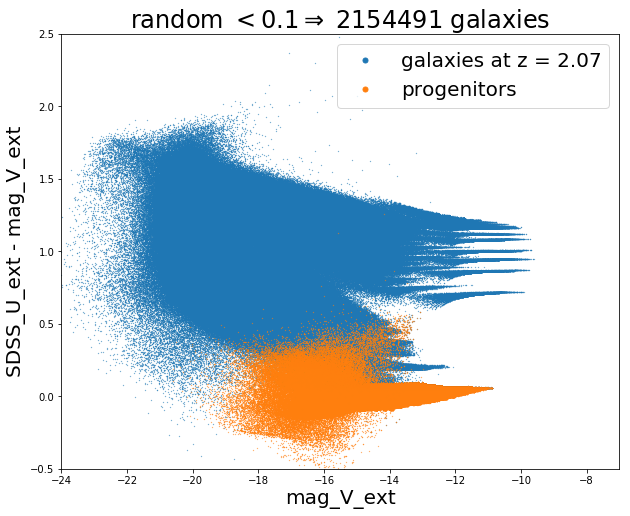

In [153]:
plt.figure(figsize=(10,8))
plt.plot(z_30_rand10['d_mag_V_ext'],z_30_rand10['d_SDSS_u_ext']-z_30_rand10['d_mag_V_ext'],'.',markersize=0.5,label='galaxies at z = 2.07')
plt.plot(z_30_rand10['p_mag_V_ext'],z_30_rand10['p_SDSS_u_ext']-z_30_rand10['p_mag_V_ext'],'.',markersize=0.5,label='progenitors')
plt.xlabel("mag_V_ext")
plt.ylabel("SDSS_U_ext - mag_V_ext")
plt.xlim(-24,-7)
plt.ylim(-0.5,2.5)
plt.title(r'random $< 0.1 \Rightarrow$ '+str(len(z_30_rand10))+' galaxies')
plt.legend(markerscale=20)
plt.savefig('../plots/005/colmag_progenitor_snap30_r10.png')
plt.show()

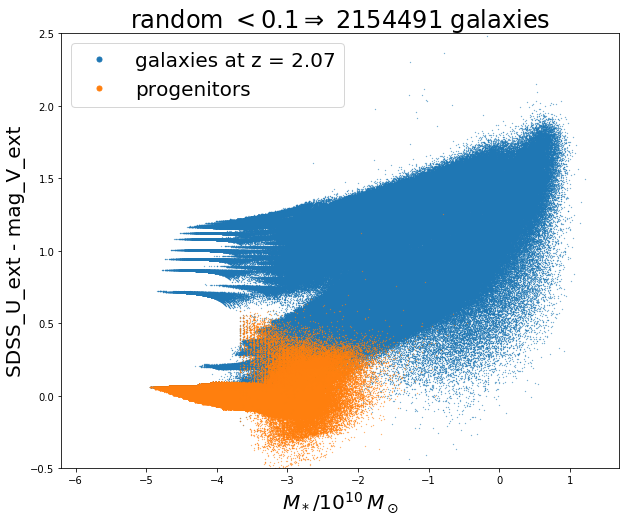

In [188]:
plt.figure(figsize=(10,8))

sel = np.where(z_30_rand10['d_stellarmass']>0.)

plt.plot(np.log10(z_30_rand10['d_stellarmass'][sel]),z_30_rand10['d_SDSS_u_ext']-z_30_rand10['d_mag_V_ext'],'.',markersize=0.5,label='galaxies at z = 2.07')
plt.plot(np.log10(z_30_rand10['p_stellarmass'][sel]),z_30_rand10['p_SDSS_u_ext']-z_30_rand10['p_mag_V_ext'],'.',markersize=0.5,label='progenitors')
plt.xlabel(r"$M_* / 10^{10} \, M_\odot$")
plt.ylabel("SDSS_U_ext - mag_V_ext")
plt.xlim(-6.2,1.7)
plt.ylim(-0.5,2.5)
plt.title(r'random $< 0.1 \Rightarrow$ '+str(len(z_30_rand10[sel]))+' galaxies')
plt.legend(markerscale=20)
plt.savefig('../plots/005/colmass_progenitor_snap30_r10.png')
plt.show()

# GOOD QUERY: random<0.1 (snapnum=21, z=4.18)

In [154]:
query =  'SELECT des.mag_V_ext as d_mag_V_ext, des.SDSS_u_ext as d_SDSS_u_ext, prog.mag_V_ext as p_mag_V_ext, prog.SDSS_u_ext as p_SDSS_u_ext ,prog.stellarmass as p_stellarmass,des.stellarmass as d_stellarmass,prog.redshift as p_redshift  ' 
query += 'FROM Gonzalez2014a..mr7 as prog, Gonzalez2014a..mr7 as des '   
query += 'WHERE des.mainleafid = prog.galaxyid '
query += 'AND des.snapnum=21 and des.random<0.1 '
z_21_rand10 = vdb.execute_query(query)

In [156]:
len(z_21_rand10)

784629

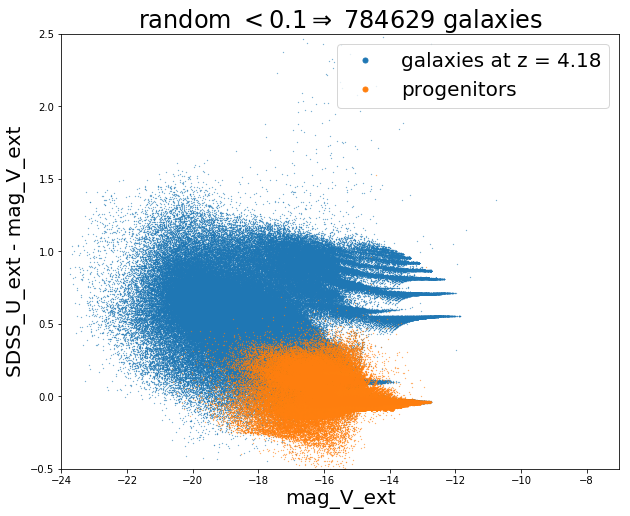

In [158]:
plt.figure(figsize=(10,8))
plt.plot(z_21_rand10['d_mag_V_ext'],z_21_rand10['d_SDSS_u_ext']-z_21_rand10['d_mag_V_ext'],'.',markersize=0.5,label='galaxies at z = 4.18')
plt.plot(z_21_rand10['p_mag_V_ext'],z_21_rand10['p_SDSS_u_ext']-z_21_rand10['p_mag_V_ext'],'.',markersize=0.5,label='progenitors')
plt.xlabel("mag_V_ext")
plt.ylabel("SDSS_U_ext - mag_V_ext")
plt.xlim(-24,-7)
plt.ylim(-0.5,2.5)
plt.title(r'random $< 0.1 \Rightarrow$ '+str(len(z_21_rand10))+' galaxies')
plt.legend(markerscale=20)
plt.savefig('../plots/005/colmag_progenitor_snap21_r10.png')
plt.show()

/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


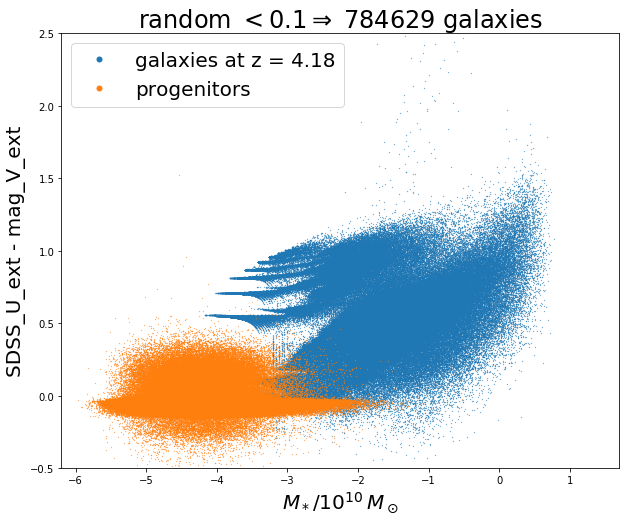

In [189]:
plt.figure(figsize=(10,8))

sel = np.where(z_21_rand10['d_stellarmass']>0.)

plt.plot(np.log10(z_21_rand10['d_stellarmass'][sel]),z_21_rand10['d_SDSS_u_ext']-z_21_rand10['d_mag_V_ext'],'.',markersize=0.5,label='galaxies at z = 4.18')
plt.plot(np.log10(z_47_rand10['p_stellarmass'][sel]),z_21_rand10['p_SDSS_u_ext']-z_21_rand10['p_mag_V_ext'],'.',markersize=0.5,label='progenitors')
plt.xlabel(r"$M_* / 10^{10} \, M_\odot$")
plt.ylabel("SDSS_U_ext - mag_V_ext")
plt.xlim(-6.2,1.7)
plt.ylim(-0.5,2.5)
plt.title(r'random $< 0.1 \Rightarrow$ '+str(len(z_21_rand10[sel]))+' galaxies')
plt.legend(markerscale=20)
plt.savefig('../plots/005/colmass_progenitor_snap21_r10.png')
plt.show()

# Vipers colour magnitude

In [ ]:
#plot vipers colour magnitude just to compare to the three one in the slides

# Distribution of magnitudes

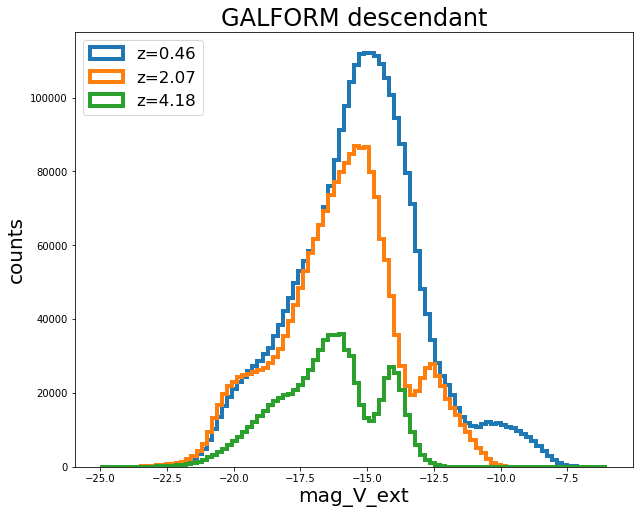

In [212]:
plt.figure(figsize=(10,8))
#plt.hist(z_47_rand10['d_mag_V_ext'],bins=30,range=(-22.5,-7.5),histtype='step',lw=4,label='descendant (z = 0.46)')
plt.hist(z_47_rand10['d_mag_V_ext'],bins=100,range=(-25,-6),histtype='step',lw=4,label='z=0.46')
plt.hist(z_30_rand10['d_mag_V_ext'],bins=100,range=(-25,-6),histtype='step',lw=4,label='z=2.07')
plt.hist(z_21_rand10['d_mag_V_ext'],bins=100,range=(-25,-6),histtype='step',lw=4,label='z=4.18')
plt.legend(loc=2,fontsize='small')
plt.xlabel("mag_V_ext")
plt.ylabel('counts')
#plt.title(r'random < 0.1')# \Rightarrow$ '+str(len(z_47_rand10))+' galaxies')
plt.title('GALFORM descendant')
plt.savefig('../plots/005/histo_liminosity_function_descendant.png')
plt.show()

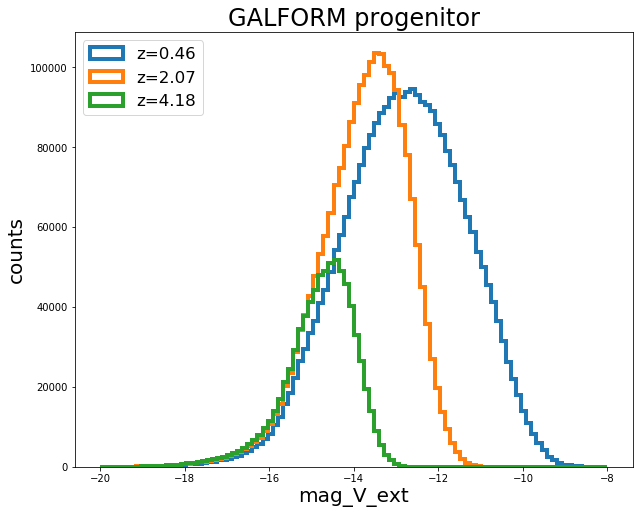

In [213]:
plt.figure(figsize=(10,8))
#plt.hist(z_47_rand10['d_mag_V_ext'],bins=30,range=(-22.5,-7.5),histtype='step',lw=4,label='descendant (z = 0.46)')
plt.hist(z_47_rand10['p_mag_V_ext'],bins=100,range=(-20,-8),histtype='step',lw=4,label='z=0.46')
plt.hist(z_30_rand10['p_mag_V_ext'],bins=100,range=(-20,-8),histtype='step',lw=4,label='z=2.07')
plt.hist(z_21_rand10['p_mag_V_ext'],bins=100,range=(-20,-8),histtype='step',lw=4,label='z=4.18')
plt.legend(loc=2,fontsize='small')
plt.xlabel("mag_V_ext")
plt.ylabel('counts')
#plt.title(r'random < 0.1')# \Rightarrow$ '+str(len(z_47_rand10))+' galaxies')
plt.title('GALFORM progenitor')
plt.savefig('../plots/005/histo_liminosity_function_progenitor.png')
plt.show()

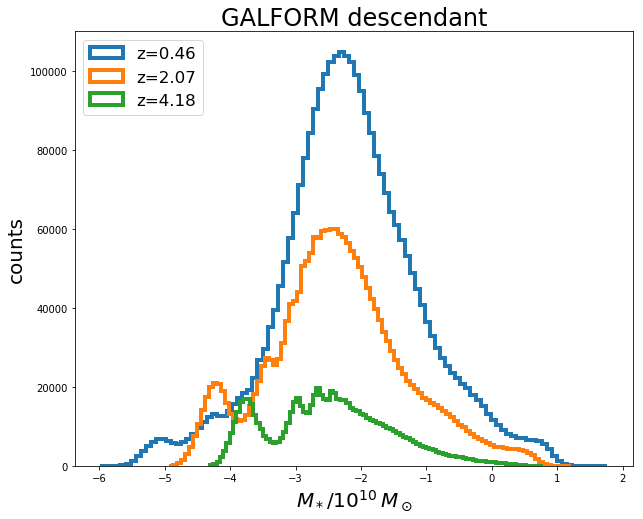

In [217]:
plt.figure(figsize=(10,8))
sel47 = np.where(z_47_rand10['d_stellarmass']>0.)
sel30 = np.where(z_30_rand10['d_stellarmass']>0.)
sel21 = np.where(z_21_rand10['d_stellarmass']>0.)
plt.hist(np.log10(z_47_rand10['d_stellarmass'][sel47]),bins=100,histtype='step',lw=4,label='z=0.46')
plt.hist(np.log10(z_30_rand10['d_stellarmass'][sel30]),bins=100,histtype='step',lw=4,label='z=2.07')
plt.hist(np.log10(z_21_rand10['d_stellarmass'][sel21]),bins=100,histtype='step',lw=4,label='z=4.18')
plt.legend(loc=2,fontsize='small')
plt.xlabel(r"$M_* / 10^{10} \, M_\odot$")
plt.ylabel('counts')
#plt.title(r'random < 0.1')# \Rightarrow$ '+str(len(z_47_rand10))+' galaxies')
plt.title('GALFORM descendant')
plt.savefig('../plots/005/histo_stellarmass_function_descendant.png')
plt.show()

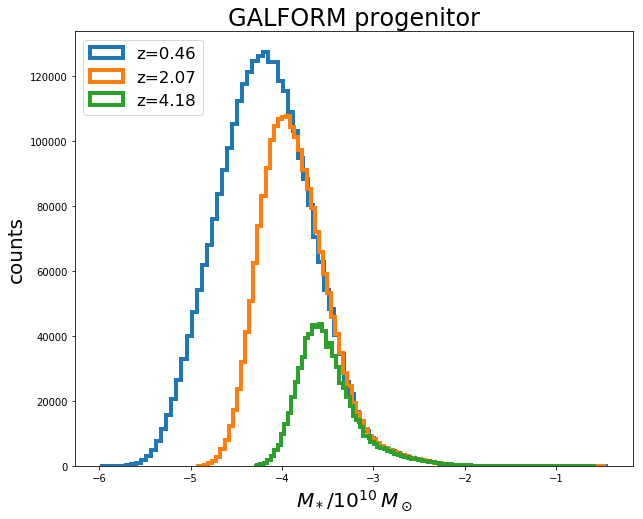

In [219]:
plt.figure(figsize=(10,8))
sel47 = np.where(z_47_rand10['p_stellarmass']>0.)
sel30 = np.where(z_30_rand10['p_stellarmass']>0.)
sel21 = np.where(z_21_rand10['p_stellarmass']>0.)
plt.hist(np.log10(z_47_rand10['p_stellarmass'][sel47]),bins=100,histtype='step',lw=4,label='z=0.46')
plt.hist(np.log10(z_30_rand10['p_stellarmass'][sel30]),bins=100,histtype='step',lw=4,label='z=2.07')
plt.hist(np.log10(z_21_rand10['p_stellarmass'][sel21]),bins=100,histtype='step',lw=4,label='z=4.18')
plt.legend(loc=2,fontsize='small')
plt.xlabel(r"$M_* / 10^{10} \, M_\odot$")
plt.ylabel('counts')
#plt.title(r'random < 0.1')# \Rightarrow$ '+str(len(z_47_rand10))+' galaxies')
plt.title('GALFORM progenitor')
plt.savefig('../plots/005/histo_stellarmass_function_progenitor.png')
plt.show()

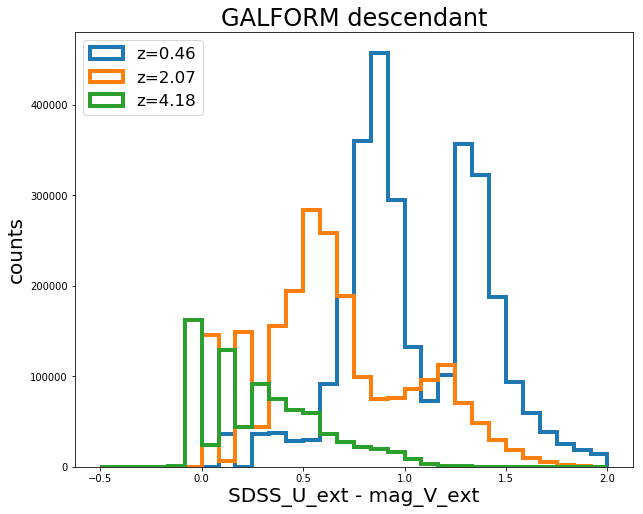

In [228]:
plt.figure(figsize=(10,8))
#plt.hist(z_47_rand10['d_mag_V_ext'],bins=30,range=(-22.5,-7.5),histtype='step',lw=4,label='descendant (z = 0.46)')
plt.hist(z_47_rand10['d_SDSS_u_ext']-z_47_rand10['d_mag_V_ext'],bins=30,range=(-0.5,2),histtype='step',lw=4,label='z=0.46')
plt.hist(z_30_rand10['d_SDSS_u_ext']-z_30_rand10['d_mag_V_ext'],bins=30,range=(-0.5,2),histtype='step',lw=4,label='z=2.07')
plt.hist(z_21_rand10['d_SDSS_u_ext']-z_21_rand10['d_mag_V_ext'],bins=30,range=(-0.5,2),histtype='step',lw=4,label='z=4.18')
plt.legend(loc=2,fontsize='small')
plt.xlabel("SDSS_U_ext - mag_V_ext")
plt.ylabel('counts')
#plt.title(r'random < 0.1')# \Rightarrow$ '+str(len(z_47_rand10))+' galaxies')
plt.title('GALFORM descendant')
plt.savefig('../plots/005/histo_colour_descendant.png')
plt.show()

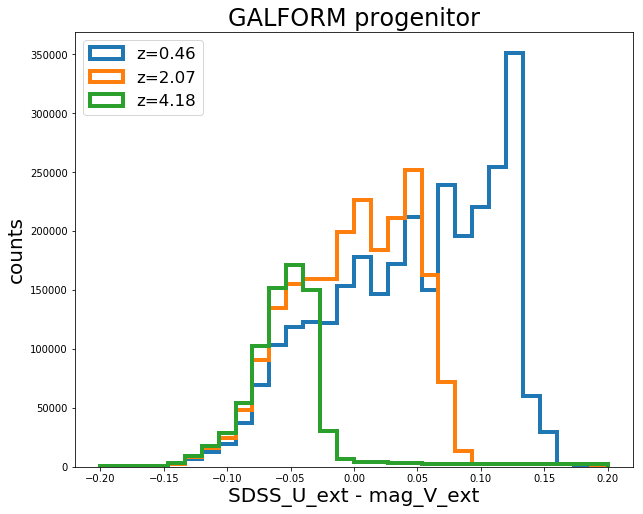

In [231]:
plt.figure(figsize=(10,8))
#plt.hist(z_47_rand10['d_mag_V_ext'],bins=30,range=(-22.5,-7.5),histtype='step',lw=4,label='descendant (z = 0.46)')
plt.hist(z_47_rand10['p_SDSS_u_ext']-z_47_rand10['p_mag_V_ext'],bins=30,range=(-0.2,0.2),histtype='step',lw=4,label='z=0.46')
plt.hist(z_30_rand10['p_SDSS_u_ext']-z_30_rand10['p_mag_V_ext'],bins=30,range=(-0.2,0.2),histtype='step',lw=4,label='z=2.07')
plt.hist(z_21_rand10['p_SDSS_u_ext']-z_21_rand10['p_mag_V_ext'],bins=30,range=(-0.2,0.2),histtype='step',lw=4,label='z=4.18')
plt.legend(loc=2,fontsize='small')
plt.xlabel("SDSS_U_ext - mag_V_ext")
plt.ylabel('counts')
#plt.title(r'random < 0.1')# \Rightarrow$ '+str(len(z_47_rand10))+' galaxies')
plt.title('GALFORM progenitor')
plt.savefig('../plots/005/histo_colour_progenitor.png')
plt.show()

# Back to Carlton's plot

/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


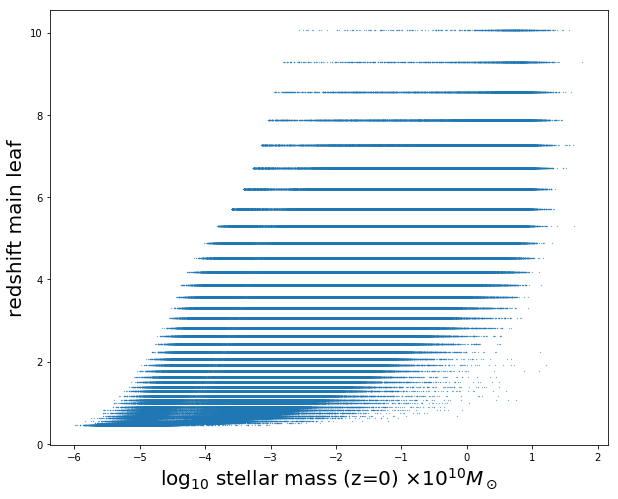

In [237]:
plt.figure(figsize=(10,8))
plt.plot(np.log10(z_47_rand10['d_stellarmass']),z_47_rand10['p_redshift'],".",markersize=0.5)
plt.xlabel(r'log$_{10}$ stellar mass (z=0) $\times 10^{10} M_\odot$')
plt.ylabel('redshift main leaf')
plt.savefig('../plots/005/progenitor_z_mass_r10.png')
plt.show()

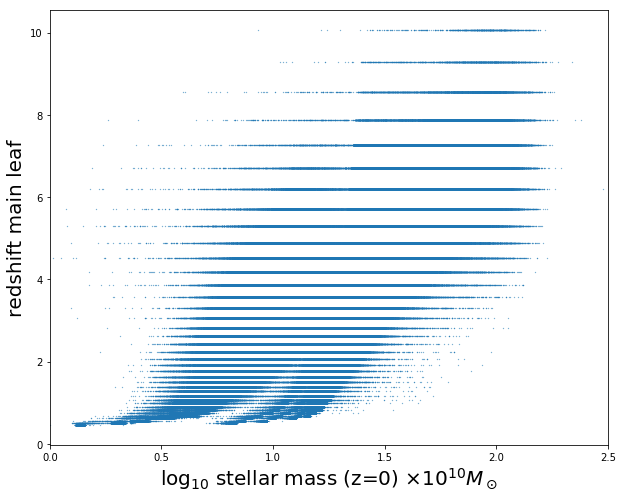

In [236]:
plt.figure(figsize=(10,8))
plt.plot(z_47_rand10['d_SDSS_u_ext']-z_47_rand10['d_mag_V_ext'],z_47_rand10['p_redshift'],".",markersize=0.5)
plt.xlabel(r'log$_{10}$ stellar mass (z=0) $\times 10^{10} M_\odot$')
plt.ylabel('redshift main leaf')
plt.xlim(0,2.5)
plt.savefig('../plots/005/progenitor_z_colour_r10.png')
plt.show()